![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrais e Primitivas

Neste teste, vamos usar os métodos de integração para calcular primitivas de funções.

De forma análoga ao caso de EDOs, vamos retornar dois `np.array`s:
- um com os pontos onde a primitiva foi calculada; e
- outro com o valor da aproximação numérica da primitiva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 0: o método do retângulo

Para evitar efeitos de bordo e arredondamento, vamos usar o método do retângulo criando pontos com `np.linspace`:

In [2]:
def retangulo(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    sum = 0
    for ponto in pts:
        sum+= (f(ponto) * h)
    return sum
    

Explique porque os pontos criados têm `endpoint=False`

Pois quando chegamos no último ponto da lista, iremos calcular a área do retângulo deste ponto, e este terá a largura equivalente a "h", exatamente o necessário para alcançarmos o ponto "b". Contemplando assim, todos os pontos de "a" até "b".

In [3]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) < 1e-3

In [4]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) > 1e-4

In [5]:
ans = (np.cos(0) - np.cos(2))
assert 1e-5 < abs(retangulo(np.sin, 0, 2, n=10**4) - ans) < 1e-4

# Questão 1: O jeito fácil

Escreva uma função `primitiva_retangulo`,
que calcula a integral de $a$ até cada um dos pontos escolhidos,
**incluindo** $a$,
chamando o método do retângulo para cada um deles.

In [6]:
a = [4,5,6]
a[:0]

[]

In [7]:
def primitiva_retangulo(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    primitivas = []
    for i,x in enumerate(pts):
        primitivas.append(retangulo(f,a,x,i))
    return pts, primitivas

In [8]:
pts, Fs = primitiva_retangulo(np.sin, 0, 1)
assert len(Fs) == len(pts)

In [9]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [10]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

## Questão 2: Gráficos

Faça os gráficos dos erros de cálculo das primitivas, no intervalo $[0, 1.5]$, das seguintes funções:
- Seno
- Exponencial
- Cosseno

para quatro valores de passo: `1e-2`, `5e-3`, `2e-3` e `1e-3`.

Use 3 eixos, um para cada função, e 4 curvas em cada eixo.

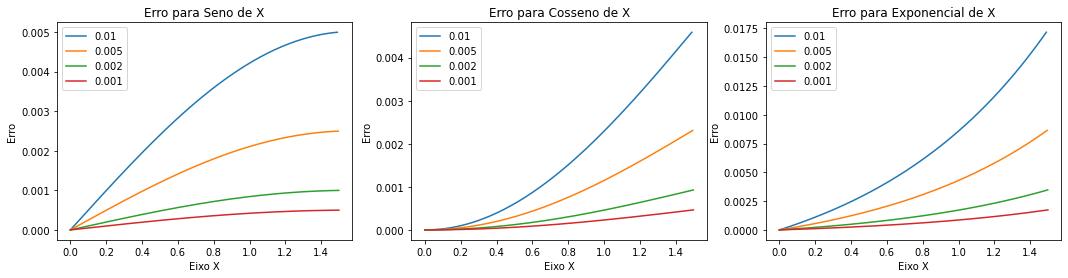

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))
hs = [1e-2, 5e-3, 2e-3, 1e-3]

erro1 = []
erro2 = []
erro3 = []

def sen(x):
    return np.sin(x)

def cos(x):
    return np.cos(x)

def expo(x):
    return np.exp(x)

axs[0].set(xlabel='Eixo X', ylabel='Erro',
       title='Erro para Seno de X')

axs[1].set(xlabel='Eixo X', ylabel='Erro',
       title='Erro para Cosseno de X')
axs[2].set(xlabel='Eixo X', ylabel='Erro',
       title='Erro para Exponencial de X')

for passo in hs:
    pts, Fs = primitiva_retangulo(sen, 0, 1.5, passo)
    erro1.append(abs(Fs - (1 - cos(pts))))
    axs[0].plot(pts,erro1[-1], label = passo)
    axs[0].legend()
    
for passo in hs:
    pts, Fs = primitiva_retangulo(cos, 0, 1.5, passo)
    erro2.append(abs(Fs - (sen(pts)))) 
    axs[1].plot(pts,erro2[-1], label = passo)
    axs[1].legend()
    
for passo in hs:
    pts, Fs = primitiva_retangulo(expo, 0, 1.5, passo)
    erro3.append(abs(Fs - (expo(pts) - 1))) 
    axs[2].plot(pts,erro3[-1], label = passo)
    axs[2].legend()



plt.show()

In [12]:
for ax in axs:
    assert len(ax.lines) == 4
    assert len(ax.get_legend().texts) == 4
    assert len(ax.get_title()) > 0

In [13]:
for ax in axs:
    for l in ax.lines:
        assert max(np.abs(l.get_ydata())) < 2e-2

Qual o erro, na extremidade final do intervalo, para cada um dos métodos e valores de $h$?

Imprima uma tabela, com 3 colunas e 4 linhas (fora as "de título"), usando `print` formatado.

In [14]:
print('                  Seno                    Cosseno             Exponencial\n',
      '------------------------------------------------------------------------------\n',
       'h= 1e-2 |' + str(erro1[0][-1]) + '  | '+ str(erro2[0][-1]) + '  | ' + str(erro3[0][-1]) + '  |\n',
       'h= 5e-3 |' + str(erro1[1][-1]) + ' | '+ str(erro2[1][-1]) + '  | ' + str(erro3[1][-1]) + ' |\n',
       'h= 2e-3 |' + str(erro1[2][-1]) + ' | '+ str(erro2[2][-1]) + ' | ' + str(erro3[2][-1]) + ' |\n',
       'h= 1e-3 |' + str(erro1[3][-1]) + ' | '+ str(erro2[3][-1]) + ' | ' + str(erro3[3][-1]) + '|\n',
      '-------------------------------------------------------------------------------')

                  Seno                    Cosseno             Exponencial
 ------------------------------------------------------------------------------
 h= 1e-2 |0.004991349535912737  | 0.0045881515959481645  | 0.01715683518009614  |
 h= 5e-3 |0.002494747659798846 | 0.0023086132183822716  | 0.008641134433969633 |
 h= 2e-3 |0.0009976606066429694 | 0.0009269355006368274 | 0.003471577071461507 |
 h= 1e-3 |0.0004987892307801722 | 0.00046404955079271115 | 0.001738315043217309|
 -------------------------------------------------------------------------------


Como os erros se comportam ao diminuir o passo?  Isso é esperado?

#### Quanto mais diminuímos o passo, mais o erro diminui. Isso é esperado, conforme diminuímos o passo, nossa integral irá observar mais pontos, ou seja, mais retângulos serão utilizados para aproximar a área em baixo da curva da função. E sabemos que quanto maior o número de retângulos, mais fácil será aproximar esta área.

Como os erros se comportam ao longo do eixo dos $x$, ou seja, ao calcular primitivas "cada vez mais longe"?  Como você explica este fenômeno?

#### O erro aumenta conforme o x aumenta. Visto que, "quanto mais longe" nossa primitiva, maior será nossa área para ser aproximada, e quanto maior esta área, maior será o nosso erro em valor absoluto, já que cada retângulo utilizado terá um erro associado, e agora precisaremos usar mais retângulos para preencher a área.

Como os erros se comportam para as diferentes funções?  Você esperava isso?

##### A função exponencial tem o maior erro associado, seguido do seno, e por último o cosseno com menor erro. Era esperado a exponencial possuir o maior erro, já que no intervalo escolhido, ela possui a maior derivada entre as 3 funções.

##### O fato de ela ter a derivada maior, faz com que a função cresça mais rapidamente, e quanto maior a função em módulo, mais difícil será para nós aproximar sua área com retângulos, já que o topo do retângulo é reto (derivada = 0) e a função terá uma área, no intervalo do nosso passo, como um "trapézio".

##### O cosseno e seno tem derivadas parecidas, por isso possuem erros semelhantes no intervalo escolhido.

## Questão 3: O jeito mais rápido

Na questão anterior, ao calcular a primitiva de $[a, a+2h]$, era necessário calcular $f(a)$ e $f(a+h)$.
Ora, $f(a)$ já tinha sido calculada para a primitiva em $[a, a+h]$ (era o único termo!),
então podemos evitar estas contas repetidas.

Vamos fazer uma nova primitiva, `primitiva_rapida`, que calcula apenas uma vez `f(pts)`,
e calcula as somas parciais usando [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).

Explique porque é ruim (neste caso!) que `np.cumsum` **não** retorne a soma vazia.

In [15]:
np.cumsum([1,2])

array([1, 3], dtype=int32)

Isto é ruim pois se o primeiro valor da nossa função for 0, ela não irá aparecer no array pois sua soma vazia não irá contar. Por isso usamos o np.hstack para resolver isso.

Para incluir a soma vazia (que vale zero!), use `np.hstack`.

In [16]:
np.hstack([[0], [1, 3]])

array([0, 1, 3])

In [17]:
def primitiva_rapida(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    primitivas = []
    for i in range(len(pts) - 1):
        primitivas.append(retangulo(f,pts[i],pts[i+1],1))
    return pts, np.cumsum(np.hstack([[0], primitivas]))

In [18]:
pts, Fs = primitiva_rapida(np.sin, 0, 1)
assert len(pts) == len(Fs)

In [19]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [20]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

Ambas as funções devem ser (a menos de erro de truncamento / arredondamento) iguais:

In [21]:
_, Fs_original = primitiva_retangulo(np.sin, 0, 1)
assert np.allclose(Fs, Fs_original, atol=1e-15, rtol=1e-15)

## Questão 4: E terá valido a pena?

Observe as duas caixas abaixo

In [22]:
%time primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%time primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

Wall time: 55.8 s
Wall time: 586 ms


In [23]:
%time primitiva_rapida(np.sin, 0, 1, h=1e-4)
%time primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

Wall time: 301 ms
Wall time: 29.9 ms


Quão mais rápido é o método usando `np.cumsum`?

É claro que o método "primitiva_rapido" é mais rapido. Enquanto estamos com o h = 1e-3, as duas funções estão na casa dos ms, porém, quando diminuímos o h em 10 vezes, aumentando assim o número de retângulos a serem calculados, enquanto a primitiva rapida aumenta seu tempo em aproximadamente 10 vezes, a lenta aumenta em quase 100 vezes.

Agora, observe com mais detalhe:

In [24]:
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

56.3 s ± 672 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
605 ms ± 35.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-4)
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

288 ms ± 6.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.3 ms ± 888 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Quantas vezes mais lento é o método "simples" com passo 10 vezes menor?

E quantas vezes mais lento é o método `np.cumsum` com passo 10 vezes menor?

Isso ajuda a explicar as diferenças acima?

Com o h = 1e-3, as duas funções demoram um tempo na casa dos ms, porém, quando diminuímos o h em 10 vezes, a primitiva rapida aumenta seu tempo em aproximadamente 10 vezes, e a lenta aumenta em quase 100 vezes. Isso demonstra bem como elas se comportam, enquanto a rapida cresce seu tempo de forma linear conforme diminuimos o passo, a lenta cresce o tempo de forma quadrática.